In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pywt as w
import cv2 as cv

Problem 3

2-D wavelet transform helps in storing information in terms of matrices which contains importannt information of high frequency and low frequency seperately. Hence help in compressing image and performing various operations like denoising. The image can be backtraced by inverse wavelet transform.

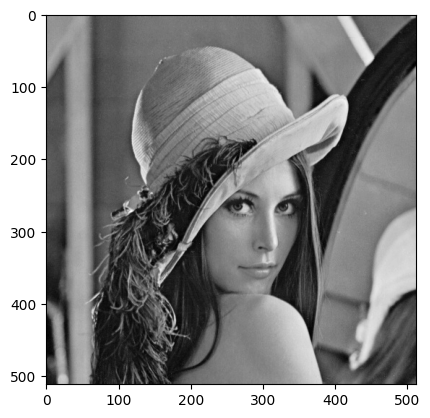

In [2]:
img1=mpimg.imread("lena.jpg")
img1=img1[:,:,0]
plt.imshow(img1,cmap="gray")

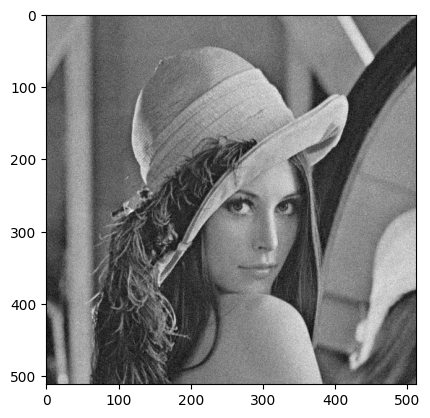

In [10]:
sigma=10
noise=np.random.normal(scale=sigma,size=np.shape(img1))
noisyImg=img1+noise
plt.imshow(noisyImg,cmap="gray")

In [11]:
cA,(cH,cV,cD)=w.dwt2(noisyImg,"haar")

In [13]:
threshold=sigma*np.sqrt(2*np.log2(noisyImg.size))
threshold


60.0

In [15]:
cA = w.threshold(cA,threshold)
cH = w.threshold(cH,threshold)
cV = w.threshold(cV,threshold)
cD = w.threshold(cD,threshold)

Text(0.5, 1.0, 'Denoise image')

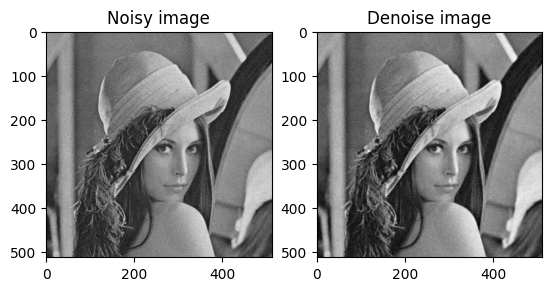

In [22]:
denoise = w.idwt2((cA,(cH,cV,cD)),"haar")
plt.subplot(1,2,1)
plt.imshow(noisyImg,cmap="gray")
plt.title("Noisy image")
plt.subplot(1,2,2)
plt.imshow(denoise,cmap="gray")
plt.title("Denoise image")

Problem 2

Optical flow helps in determining the change of luminence with respect to different images with different positions of same object. It is assumed that if there is change in position with respect to time the intensity of a perticlar object remains same. The neighbouring pixels have similar motion.
I(x,y,t)=I(x+dx,y+dy,t+dt)
where I(x,y,t)=image at time t
I(x+dx,y+dy,t+dt)=image after dt time
The above equation is reduced to below form using Taylor series expansion:
fx*u+fy*v+ft=0
where:
fx=∂f/∂x  fy=∂f/∂y  u=dx/dt  v=dy/dt
Lucas-Kanade method
It solves the equation for finding the optical flow using 3X3 patch around the point. This makes 9 equations of two variables which are over determined. Therefore, it is further reduced to below form:
[[u],[v]]=[[∑ifxi2,∑ifxifyi],[∑ifxifyi,∑ifyi2]]−1[[−∑ifxifti],[−∑ifyifti]]

In [24]:
cap1 = cv.VideoCapture("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\Flower.mp4")
cap2 = cv.VideoCapture("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\roadtrip.mp4")

Slow Motion

In [26]:
ret,first_frame = cap1.read()
prev_gray = cv.cvtColor(first_frame,cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[...,1] = 255
while(cap1.isOpened()):
    ret, frame = cap1.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    cv.imshow("dense optical flow", rgb)
    prev_gray = gray
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap1.release()
cv.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

In [ ]:
ret,first_frame = cap2.read()
prev_gray = cv.cvtColor(first_frame,cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[...,1] = 255
while(cap2.isOpened()):
    ret, frame = cap2.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    cv.imshow("dense optical flow", rgb)
    prev_gray = gray
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap2.release()
cv.destroyAllWindows()